## Load the Data

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (7, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

**Load Dataset**

In [3]:
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Summarize the Dataset

**Dimensions of Dataset**

In [5]:
insurance.shape

(1338, 7)

**Data Type of attributes**

In [6]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Statistical Summary of Numerical Attributes**

In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


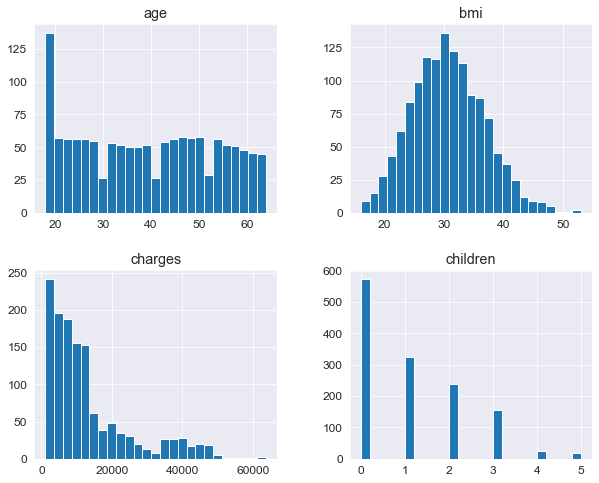

In [8]:
insurance.hist(bins = 25, figsize=(10,8));

Few points to remember from the histogram:
- Most of the clients are of the age 20.
- Most of the clients have BMI of 30.
- Most of the clients doesn't have any child.

**Distribution of Categorical Attributes**

- Sex

In [9]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

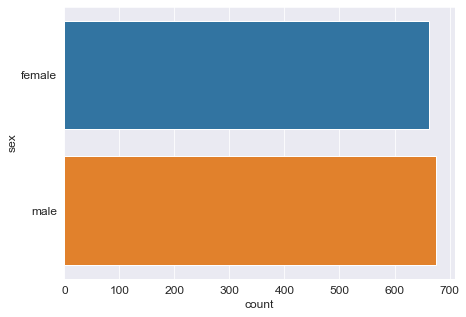

In [10]:
sns.countplot(y = 'sex', data = insurance);

Proportion of male and female is almost equal.

- Smoker

In [11]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

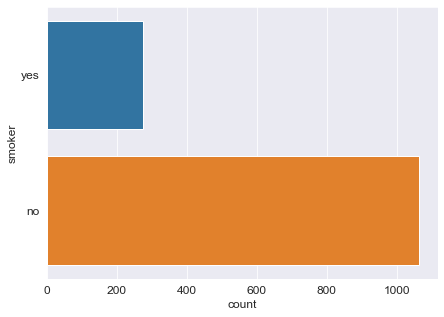

In [12]:
sns.countplot(y = 'smoker', data = insurance);

Non-smoking clients are more as compared to the smoking ones.

- Region

In [13]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

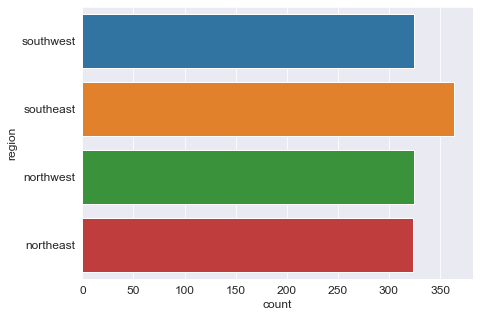

In [14]:
sns.countplot(y = 'region', data = insurance);

Southeast region have more number of clients as compared to the others.

## Create a Test Set

- **Random Sampling**

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance, test_size = 0.2, random_state =42)

- **Stratified Sampling**

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

splits = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in splits.split(insurance, insurance['smoker']):
    strat_train_set = insurance.loc[train_index]
    strat_test_set = insurance.loc[test_index]

**Compare Random and Stratified Sampling results**

In [17]:
def smoker_cat_proprotions(data):
    return data['smoker'].value_counts() / len(data)

compare_props = pd.DataFrame({
    'Overall': smoker_cat_proprotions(insurance),
    'Random': smoker_cat_proprotions(test_set),
    'Stratified': smoker_cat_proprotions(strat_test_set)
}).sort_index()
compare_props['Random % Error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Stratified % Error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

In [18]:
compare_props

,Overall,Random,Stratified,Random % Error,Stratified % Error
no,0.795217,0.798507,0.794776,0.413814,-0.055409
yes,0.204783,0.201493,0.205224,-1.606929,0.215165


As, we can see Stratified Sampling samples the dataset into train set and test set much better than the Random Sampling.Therefore, we will use the train set and test set of Stratified Sampling.

**Discover and visualize data to gain insights**

In [19]:
insurance = strat_train_set.copy()

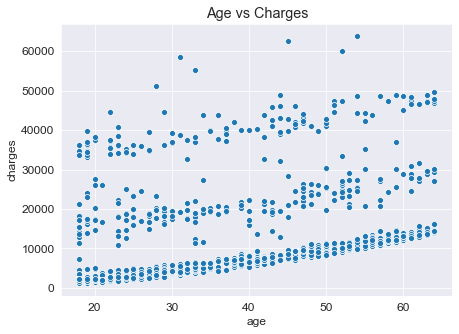

In [20]:
plt.title('Age vs Charges')
sns.scatterplot(x = 'age', y = 'charges', data = insurance);

We can notice that older persons tends to pay slightly more premium charges.

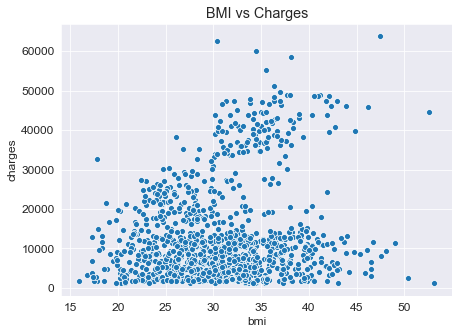

In [21]:
plt.title('BMI vs Charges')
sns.scatterplot(x = 'bmi', y = 'charges', data = insurance);

When bmi is 30 or more, there is a high probablity of charging more premium.

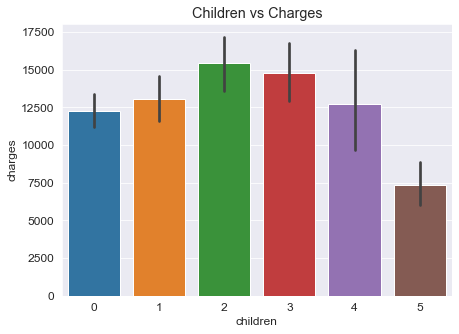

In [22]:
plt.title('Children vs Charges')
sns.barplot(x = 'children', y = 'charges', data = insurance);

We can say that person having 2 or 3 children tend to pay more. But surprisingly, person having 5 children pays the least insurance charges. 

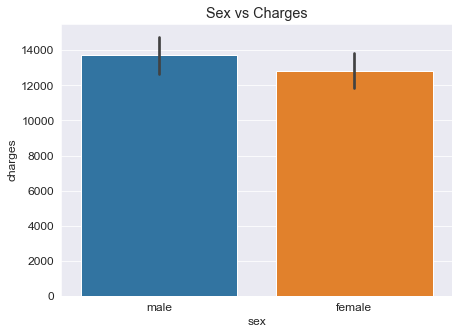

In [23]:
plt.title('Sex vs Charges')
sns.barplot(x = 'sex', y = 'charges', data = insurance);

There is very less difference between the average cost paid by male and female.

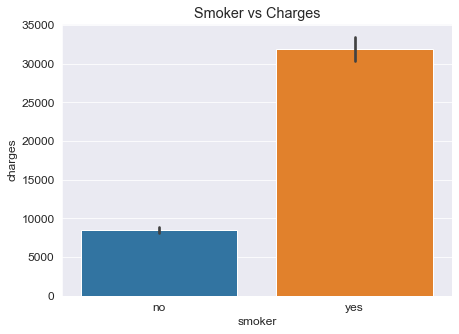

In [24]:
plt.title('Smoker vs Charges')
sns.barplot(x = 'smoker', y = 'charges', data = insurance);

We can notice that smokers are charged more as compared to non-smokers.  

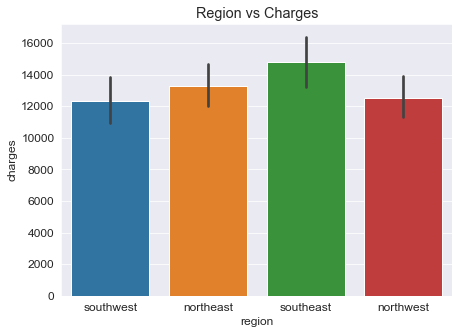

In [25]:
plt.title('Region vs Charges')
sns.barplot(x = 'region', y = 'charges', data = insurance);

It can be seen that persons of southeast and notheast region pays more premium charges.

**Prepare the data for Machine Leaning Algorithm**

In [26]:
insurance_label = strat_train_set['charges'].copy()
insurance = strat_train_set.drop('charges', axis = 1)

Lets preprocess Categorical input features

In [27]:
insurance_category = insurance[['sex', 'smoker', 'region']]
insurance_category.head(10)

,sex,smoker,region
294,male,no,southwest
179,female,no,northeast
1335,female,no,southeast
634,male,no,southwest
67,male,no,northwest
1239,female,no,southeast
979,female,no,southeast
1231,female,yes,southwest
942,female,no,northeast
80,male,no,northeast


In [28]:
insurance_num = insurance.drop(['sex', 'smoker', 'region'], axis=1)

In [29]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
insurance_category_onehot = cat_encoder.fit_transform(insurance_category)
insurance_category_onehot

<1070x8 sparse matrix of type '<class 'numpy.float64'>'
	with 3210 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs = list(insurance_num)
cat_attribs = ['sex', 'smoker', 'region']

pipeline = ColumnTransformer([
    ('std_scaler', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

insurance_prepared = pipeline.fit_transform(insurance)

In [31]:
insurance_prepared

array([[-1.00715695, -0.656649  ,  1.56520739, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.1331464 ,  0.3949374 ,  1.56520739, ...,  0.        ,
         0.        ,  0.        ],
       [-1.50603966,  1.00636332, -0.91471153, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.50827423,  1.08661814, -0.08807189, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41822224, -0.35879605,  0.73856775, ...,  0.        ,
         1.        ,  0.        ],
       [-1.36350174,  0.19057718, -0.91471153, ...,  1.        ,
         0.        ,  0.        ]])

In [32]:
insurance_prepared.shape

(1070, 11)

**Select and Train a Model**

- Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(insurance_prepared, insurance_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
from sklearn.metrics import mean_squared_error

insurance_prediction = lin_reg.predict(insurance_prepared)
lin_mse = mean_squared_error(insurance_label, insurance_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6154.852330680004

- Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(insurance_prepared, insurance_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
insurance_prediction = tree_reg.predict(insurance_prepared)
tree_mse = mean_squared_error(insurance_label, insurance_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

494.20598375812835

- Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(insurance_prepared, insurance_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [38]:
insurance_prediction = forest_reg.predict(insurance_prepared)
forest_mse = mean_squared_error(insurance_label, insurance_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2131.4196864125233

- SVR 

In [39]:
from sklearn.svm import SVR

svm_linear_reg = SVR(kernel='linear')
svm_linear_reg.fit(insurance_prepared, insurance_label)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
insurance_prediction = svm_linear_reg.predict(insurance_prepared)
svm_linear_mse = mean_squared_error(insurance_label, insurance_prediction)
svm_linear_rmse = np.sqrt(svm_linear_mse)
svm_linear_rmse

12509.059598130121

**Fine tune the model**

Appling cross validation to confirm the best model from the above model.

In [41]:
def display_score(score):
    print('Scores:', score)
    print('Mean:', score.mean())
    print('Std Deviation', score.std())

In [42]:
from sklearn.model_selection import cross_val_score

lin_score = cross_val_score(lin_reg, insurance_prepared, insurance_label,
                           scoring='neg_mean_squared_error', cv = 10)
lin_rmse_score = np.sqrt(-lin_score)
display_score(lin_rmse_score)

Scores: [5887.61013922 6505.37306632 6534.4409647  5586.73963535 5703.67975047
 6977.94937061 6162.47234858 5422.72525173 6342.91594103 6882.47821823]
Mean: 6200.638468624105
Std Deviation 512.0624911925219


In [43]:
tree_score = cross_val_score(tree_reg, insurance_prepared, insurance_label,
                           scoring='neg_mean_squared_error', cv = 10)
tree_rmse_score = np.sqrt(-tree_score)
display_score(tree_rmse_score)

Scores: [5459.25041725 6490.22182478 7113.32386242 7135.91042056 5900.82757762
 8466.51896413 5620.192622   5868.74281227 6929.36667847 7570.64154929]
Mean: 6655.4996728786045
Std Deviation 913.8589719607818


In [44]:
forest_score = cross_val_score(forest_reg, insurance_prepared, insurance_label,
                           scoring='neg_mean_squared_error', cv = 10)
forest_rmse_score = np.sqrt(-forest_score)
display_score(forest_rmse_score)

Scores: [4378.01733599 5117.15186427 5592.22907636 4435.25063651 4863.98439002
 5978.647518   4597.55274169 4120.59068446 4976.72286813 5952.4828679 ]
Mean: 5001.26299833169
Std Deviation 623.6657240519941


In [45]:
svm_lin_score = cross_val_score(svm_linear_reg, insurance_prepared, insurance_label,
                           scoring='neg_mean_squared_error', cv = 10)
svm_rmse_score = np.sqrt(-svm_lin_score)
display_score(svm_rmse_score)

Scores: [11856.45335393 13122.57394367 12455.19679572 13035.96827454
  9650.52301232 12310.05256197 13941.56322122 13940.76476273
 12186.02938351 12300.71040422]
Mean: 12479.983571382854
Std Deviation 1163.3921948833145


As we can see Random Forest Regressor is the best model, but it seems to be overfitted. So, lets tune its hyperparameter to improve our model.

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(insurance_prepared, insurance_label)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [47]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

4785.617423531865 {'max_features': 7, 'n_estimators': 180}
4880.815565344858 {'max_features': 5, 'n_estimators': 15}
4893.655013807682 {'max_features': 3, 'n_estimators': 72}
4873.988672352836 {'max_features': 5, 'n_estimators': 21}
4791.115038446638 {'max_features': 7, 'n_estimators': 122}
4903.407406087904 {'max_features': 3, 'n_estimators': 75}
4891.345996917166 {'max_features': 3, 'n_estimators': 88}
4744.069413689725 {'max_features': 5, 'n_estimators': 100}
4886.613647765072 {'max_features': 3, 'n_estimators': 150}
5962.146997880429 {'max_features': 5, 'n_estimators': 2}


In [48]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [49]:
final_model = rnd_search.best_estimator_

y_test = strat_test_set['charges'].copy()
X_test = strat_test_set.drop('charges', axis = 1)

X_test_prepared = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [50]:
final_rmse

4624.724988724821

In [51]:
from sklearn.pipeline import Pipeline
full_pipeline_with_predictor = Pipeline([
    ('preparation', pipeline),
    ('final_model', final_model)
])
full_pipeline_with_predictor.fit(insurance, insurance_label)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('std_scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 

In [52]:
model = full_pipeline_with_predictor

In [53]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']